In [ ]:
import boto3
bucket_name = 'dataminds-warehouse'
s3_file_key = 'HousingPrices-Amsterdam-August-2021.csv'            # e.g. 'folder/myfile.txt'
local_file_path = 'HousingPrices-Amsterdam-August-2021.csv'        # Local destination

# Create an S3 client (remove `bucket_name` here — not a valid argument for boto3.client)
s3 = boto3.client(
    's3',
    region_name='us-east-1'
)

# Download the file
try:
    s3.download_file(bucket_name, s3_file_key, local_file_path)
    print(f"✅ File downloaded successfully from s3://{bucket_name}/{s3_file_key} to {local_file_path}")
except Exception as e:
    print("❌ Error downloading file:", e)

✅ File downloaded successfully from s3://dataminds-warehouse/HousingPrices-Amsterdam-August-2021.csv to HousingPrices-Amsterdam-August-2021.csv


In [1]:
import pandas as pd
df = pd.read_csv('HousingPrices-Amsterdam-August-2021.csv')
df.head()

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


In [2]:
df.rename(columns={'Unnamed: 0': 'id'}, inplace=True)

In [3]:
df.columns

Index(['id', 'Address', 'Zip', 'Price', 'Area', 'Room', 'Lon', 'Lat'], dtype='object')

In [4]:
df.columns = df.columns.str.lower()
df.columns

Index(['id', 'address', 'zip', 'price', 'area', 'room', 'lon', 'lat'], dtype='object')

In [5]:
df.tail(3)

,id,address,zip,price,area,room,lon,lat
921,922,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256
922,923,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268
923,924,"S. F. van Ossstraat 334, Amsterdam",1068 JS,300000.0,79,4,4.810678,52.355493


In [6]:
df.shape

(924, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       924 non-null    int64  
 1   address  924 non-null    object 
 2   zip      924 non-null    object 
 3   price    920 non-null    float64
 4   area     924 non-null    int64  
 5   room     924 non-null    int64  
 6   lon      924 non-null    float64
 7   lat      924 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 57.9+ KB


In [8]:
df.isna().sum()

id         0
address    0
zip        0
price      4
area       0
room       0
lon        0
lat        0
dtype: int64

In [9]:
df[df.price.isna()]

,id,address,zip,price,area,room,lon,lat
73,74,"Falckstraat 47 A, Amsterdam",1017 VV,NaN,147,3,4.897454,52.360707
321,322,"Haarlemmerweg 705, Amsterdam",1067 HP,NaN,366,12,4.787874,52.383877
610,611,"Zeeburgerkade 760, Amsterdam",1019 HT,NaN,107,3,4.945022,52.369244
727,728,"Suikerplein 16, Amsterdam",1013 CK,NaN,81,3,4.880976,52.389623


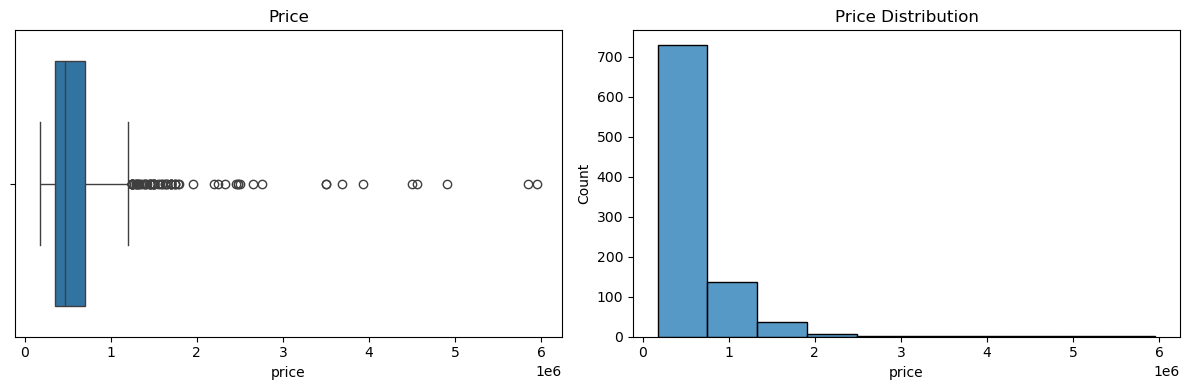

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['price'])
plt.title("Price")
plt.subplot(1, 2, 2)
sns.histplot(df['price'], bins=10)
plt.title("Price Distribution")
plt.tight_layout()
plt.show()

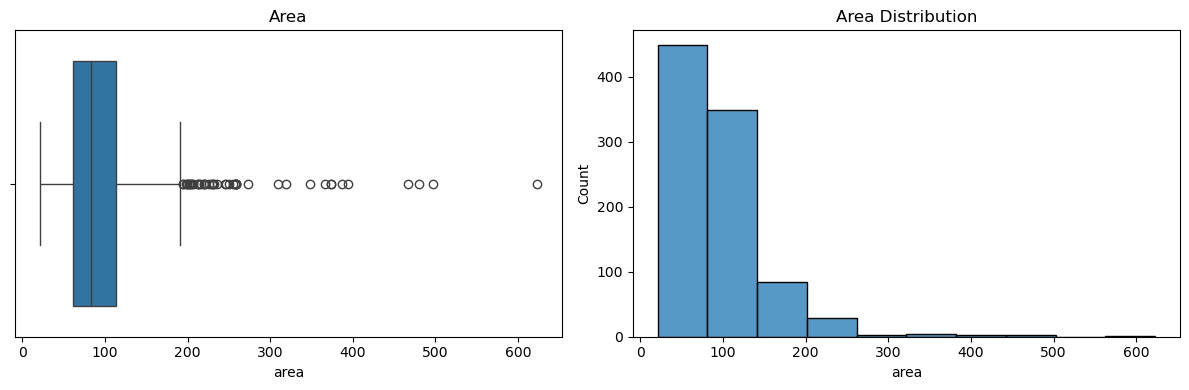

In [11]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['area'])
plt.title("Area")
plt.subplot(1, 2, 2)
sns.histplot(df['area'], bins=10)
plt.title("Area Distribution")
plt.tight_layout()
plt.show()

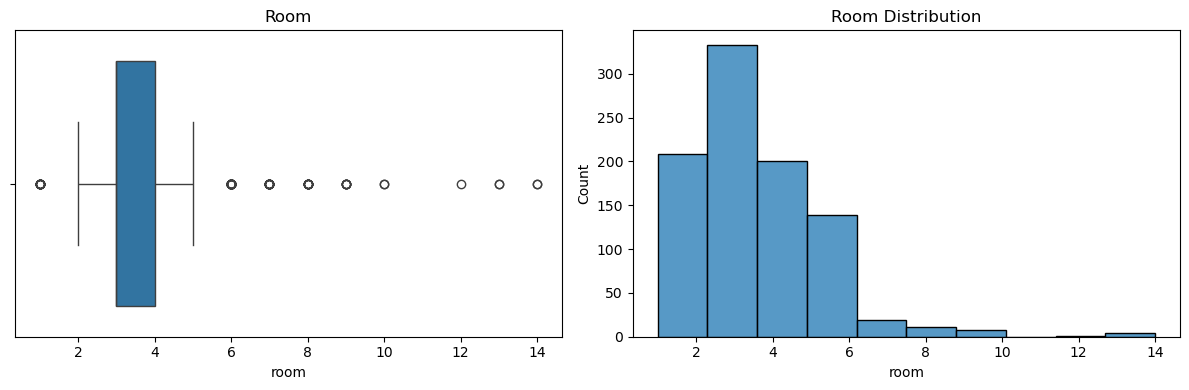

In [12]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['room'])
plt.title("Room")
plt.subplot(1, 2, 2)
sns.histplot(df['room'], bins=10)
plt.title("Room Distribution")
plt.tight_layout()
plt.show()
#we have outliers in all of them and they are right-skewed.

In [13]:
#df['price'].fillna(df['price'].median(), inplace=True)
#my data is skewed so I'll use median instead of mean.
df.fillna({'price':df['price'].median()},inplace=True)

In [14]:
#custom method for returning numbers of outliers
def outlier_counter(x):
    Q1 = df[f'{x}'].quantile(0.25)
    Q3 = df[f'{x}'].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[f'{x}'] < Q1 - 1.5*IQR) | (df[f'{x}'] > Q3 + 1.5*IQR)]
    return outliers.count()

In [15]:
outlier_counter("price")

id         71
address    71
zip        71
price      71
area       71
room       71
lon        71
lat        71
dtype: int64

In [16]:
outlier_counter("area")

id         47
address    47
zip        47
price      47
area       47
room       47
lon        47
lat        47
dtype: int64

In [17]:
outlier_counter("room")

id         102
address    102
zip        102
price      102
area       102
room       102
lon        102
lat        102
dtype: int64

In [18]:
from scipy.stats import skew
cols = ['price', 'area', 'room']
for col in cols:
    print(f"{col} skewness: {skew(df[col]):.2f}")

price skewness: 4.83
area skewness: 3.14
room skewness: 2.03


In [19]:
import numpy as np

df['price_log'] = np.log1p(df['price'])
df['area_log'] = np.log1p(df['area'])
df['room_log'] = np.log1p(df['room'])

In [20]:
from scipy.stats import skew

for col in ['price_log', 'area_log', 'room_log']:
    print(f"{col} skewness: {skew(df[col]):.2f}")

price_log skewness: 1.08
area_log skewness: 0.41
room_log skewness: 0.45


In [21]:
outlier_counter("price_log")

id           18
address      18
zip          18
price        18
area         18
room         18
lon          18
lat          18
price_log    18
area_log     18
room_log     18
dtype: int64

In [22]:
outlier_counter("area_log")

id           14
address      14
zip          14
price        14
area         14
room         14
lon          14
lat          14
price_log    14
area_log     14
room_log     14
dtype: int64

In [23]:
outlier_counter("room_log")

id           102
address      102
zip          102
price        102
area         102
room         102
lon          102
lat          102
price_log    102
area_log     102
room_log     102
dtype: int64

In [24]:
#Well, those outliers are real data, not a mistake, so I will keep them as it is.
room_outliers = df[(df['room_log'] < df['room_log'].quantile(0.25) - 1.5 * (df['room_log'].quantile(0.75) - df['room_log'].quantile(0.25))) |
                   (df['room_log'] > df['room_log'].quantile(0.75) + 1.5 * (df['room_log'].quantile(0.75) - df['room_log'].quantile(0.25)))]

print(room_outliers[['id', 'address', 'price', 'area', 'room']])

      id                            address      price  area  room
3      4       Tenerifestraat 40, Amsterdam   580000.0   128     6
16    17  Paramaribostraat 122 3, Amsterdam   700000.0   102     6
20    21     Keizersgracht 171 F, Amsterdam  1625000.0   199     6
28    29      Colenbranderhof 30, Amsterdam  1650000.0   235     7
33    34      Vondelstraat 51 hs, Amsterdam  3925000.0   319     7
..   ...                                ...        ...   ...   ...
900  901      Kanaalstraat 100 G, Amsterdam   199000.0    21     1
906  907        Buiksloterweg 99, Amsterdam  1250000.0   180     9
917  918          Kromme Waal 18, Amsterdam  1500000.0   194     9
918  919                Ringdijk, Amsterdam   295000.0    41     1
919  920                Ringdijk, Amsterdam   750000.0   117     1

[102 rows x 5 columns]


In [25]:
#There are not any unrealistic values for size of the area
df[df['area']<10]

,id,address,zip,price,area,room,lon,lat,price_log,area_log,room_log


In [26]:
#Neither for room
df[df['room']<1]

,id,address,zip,price,area,room,lon,lat,price_log,area_log,room_log


<Axes: xlabel='area', ylabel='price'>

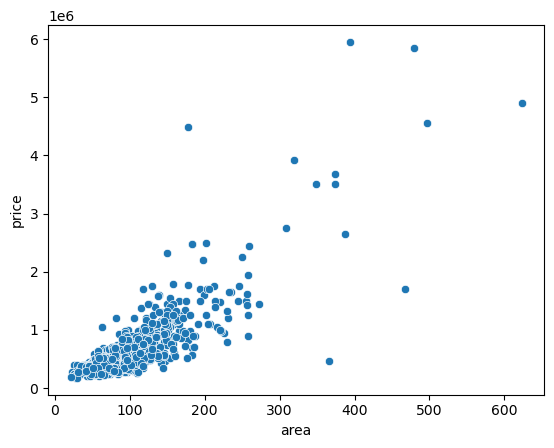

In [27]:
sns.scatterplot(x='area', y='price', data=df)

<Axes: xlabel='area_log', ylabel='price_log'>

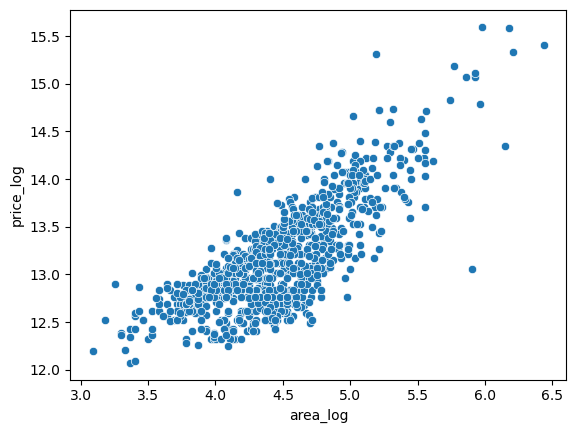

In [28]:
#it seems we have better correlation now
sns.scatterplot(x='area_log', y='price_log', data=df)

<Axes: xlabel='room', ylabel='price'>

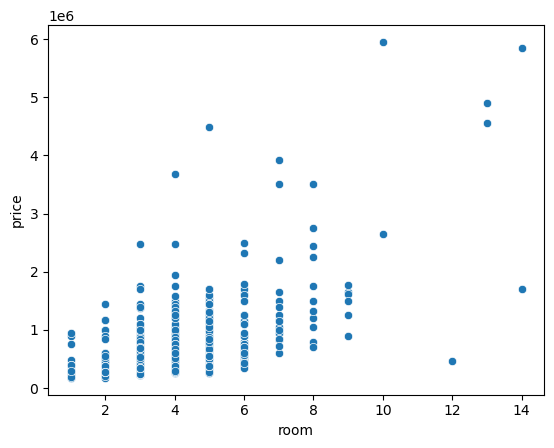

In [29]:
sns.scatterplot(x='room', y='price', data=df)

<Axes: xlabel='room_log', ylabel='price_log'>

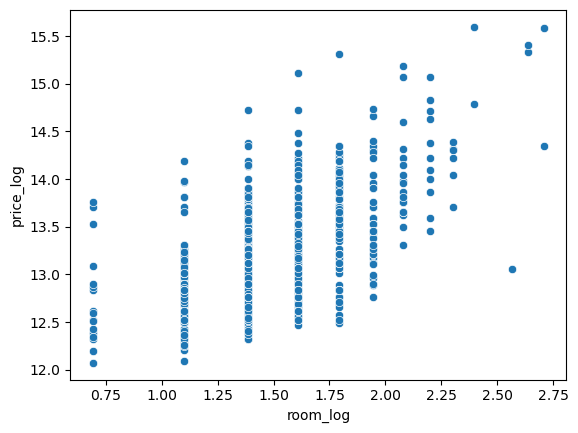

In [30]:
sns.scatterplot(x='room_log', y='price_log', data=df)

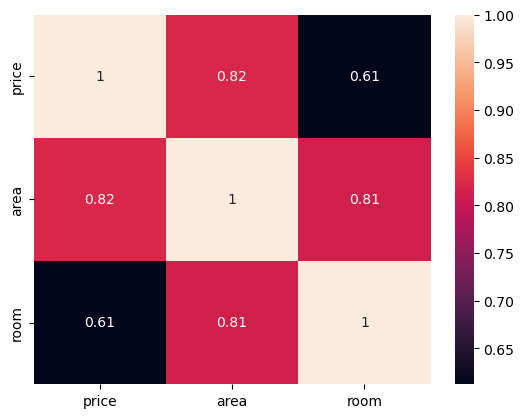

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df[['price', 'area', 'room']].corr(), annot=True)
plt.show()



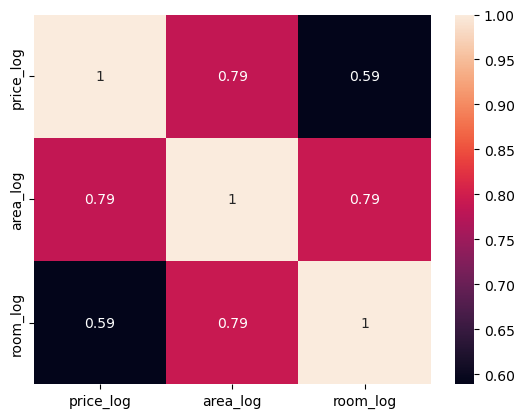

In [32]:
#correlation between area and room decreased
sns.heatmap(df[['price_log', 'area_log', 'room_log']].corr(), annot=True)
plt.show()

In [33]:
df['city']=df.address.str.split(',').str[1]
df['street']=df.address.str.split(',').str[0].str.split(r"\d").str[0]

In [34]:
df.tail()

,id,address,zip,price,area,room,lon,lat,price_log,area_log,room_log,city,street
919,920,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173,13.527830,4.770685,0.693147,Amsterdam,Ringdijk
920,921,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587,12.765691,4.290459,1.386294,Amsterdam,Kleine Beerstraat
921,922,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256,12.765691,3.951244,1.386294,Amsterdam,Stuyvesantstraat
922,923,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268,13.303019,4.736198,1.609438,Amsterdam,John Blankensteinstraat
923,924,"S. F. van Ossstraat 334, Amsterdam",1068 JS,300000.0,79,4,4.810678,52.355493,12.611541,4.382027,1.609438,Amsterdam,S. F. van Ossstraat


In [35]:
df.groupby('city')['price'].mean()
#it seems we do not need city table so i will drop, If we would collect more data from other countries as well i would keep it

city
Amsterdam    621394.140693
Name: price, dtype: float64

In [36]:
df.drop(columns='city',inplace=True)

In [37]:
# we do not need amsterdam part so i will remove from there to to save some space
df['address']=df.address.str.split(',').str[0]

In [38]:
df.groupby('street')['price'].mean()

street
                         3.100000e+05
't Nopeind               7.650000e+05
Aalbersestraat           2.950000e+05
Aalsmeerweg              4.375000e+05
Achillesstraat           4.000000e+05
                             ...     
Zocherstraat             1.200000e+06
Zuideinde                7.476667e+05
Zuidelijke Wandelweg     9.025000e+05
Zwanenplein              4.650000e+05
ms. van Riemsdijkweg     7.500000e+05
Name: price, Length: 624, dtype: float64

In [41]:
df.zip.str.split(" ").str[0]

0      1091
1      1059
2      1097
3      1060
4      1036
       ... 
919    1097
920    1033
921    1058
922    1095
923    1068
Name: zip, Length: 924, dtype: object

In [42]:
#I seperated zip  to  number and letter parts
df["district"]=df.zip.str.split(" ").str[0]
df["sector"]=df.zip.str.split(" ").str[1]
df.drop(columns='zip',inplace=True)
df.head()

,id,address,price,area,room,lon,lat,price_log,area_log,room_log,street,district,sector
0,1,Blasiusstraat 8 2,685000.0,64,3,4.907736,52.356157,13.437176,4.174387,1.386294,Blasiusstraat,1091,CR
1,2,Kromme Leimuidenstraat 13 H,475000.0,60,3,4.850476,52.348586,13.071072,4.110874,1.386294,Kromme Leimuidenstraat,1059,EL
2,3,Zaaiersweg 11 A,850000.0,109,4,4.944774,52.343782,13.652993,4.700480,1.609438,Zaaiersweg,1097,SM
3,4,Tenerifestraat 40,580000.0,128,6,4.789928,52.343712,13.270785,4.859812,1.945910,Tenerifestraat,1060,TH
4,5,Winterjanpad 21,720000.0,138,5,4.902503,52.410538,13.487008,4.934474,1.791759,Winterjanpad,1036,KN


In [43]:
df.groupby('sector')['price'].mean()

sector
AA    3.313333e+05
AB    1.375000e+06
AC    3.250000e+05
AD    8.916250e+05
AE    1.114857e+06
          ...     
ZS    3.495000e+05
ZT    4.800000e+05
ZV    5.475000e+05
ZW    4.962500e+05
ZZ    4.250000e+05
Name: price, Length: 346, dtype: float64

In [44]:
df.groupby('district')['price'].mean()

district
1011    7.453750e+05
1012    1.093533e+06
1013    5.713333e+05
1014    9.630000e+05
1015    9.377727e+05
            ...     
1104    3.500098e+05
1106    3.089000e+05
1107    2.996667e+05
1108    3.250000e+05
1109    5.120005e+05
Name: price, Length: 70, dtype: float64

In [ ]:
import boto3

# Replace with your actual credentials and info
bucket_name = 'dataminds-homeworks'
s3_file_key = 'vasif-orujzada-eda.ipynb'
local_file_path = 'vasif-orujzada-eda.ipynb'

# Create an S3 client
s3 = boto3.client(
    's3'
)

# Upload the file
try:
    s3.upload_file(local_file_path, bucket_name, s3_file_key)
    print(f"File uploaded successfully to s3://{bucket_name}/{s3_file_key}")
except Exception as e:
    print("Error uploading file:", e)

 